<a href="https://colab.research.google.com/github/swastikbanerjee/Projects_ML/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

In [ ]:
data.shape

(7043, 21)

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df1 = data.drop(columns=['customerID'],axis=1)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Using Label Encoder to encode categorical values into numerical values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['gender']=le.fit_transform(df1['gender'])
df1['Partner']=le.fit_transform(df1['Partner'])
df1['Dependents']=le.fit_transform(df1['Dependents'])
df1['PhoneService']=le.fit_transform(df1['PhoneService'])
df1['MultipleLines']=le.fit_transform(df1['MultipleLines'])
df1['InternetService']=le.fit_transform(df1['InternetService'])
df1['OnlineSecurity']=le.fit_transform(df1['OnlineSecurity'])
df1['OnlineBackup']=le.fit_transform(df1['OnlineBackup'])
df1['DeviceProtection']=le.fit_transform(df1['DeviceProtection'])
df1['TechSupport']=le.fit_transform(df1['TechSupport'])
df1['StreamingTV']=le.fit_transform(df1['StreamingTV'])
df1['StreamingMovies']=le.fit_transform(df1['StreamingMovies'])
df1['Contract']=le.fit_transform(df1['Contract'])
df1['PaperlessBilling']=le.fit_transform(df1['PaperlessBilling'])
df1['PaymentMethod']=le.fit_transform(df1['PaymentMethod'])
df1['Churn']=le.fit_transform(df1['Churn'])

In [ ]:
df1.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.5,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.4,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.9,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,0


In [ ]:
df1.drop(df1[df1.TotalCharges == ' '].index, inplace=True)
df1.drop(df1[df1.Churn == ' '].index, inplace=True)

In [ ]:
df1['TotalCharges'] = df1['TotalCharges'].astype(float)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


Train-Test Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X = df1.drop('Churn', axis=1)
Y = df1['Churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2964,1,0,1,0,24,1,2,0,2,0,0,2,0,0,1,1,2,58.35,1346.90
5113,0,0,1,1,71,1,2,1,2,2,2,2,2,2,2,0,1,113.65,8166.80
5363,1,0,1,1,70,1,2,2,1,1,1,1,1,1,2,0,3,25.35,1715.15
5074,0,0,0,1,49,1,0,2,1,1,1,1,1,1,1,0,1,19.45,921.30
156,0,0,0,0,22,1,2,1,0,0,0,0,2,0,0,1,0,84.15,1821.95


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

Evaluating Model's Performance

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, matthews_corrcoef

# Make predictions on the test data
Y_pred = log_reg.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Calculate Precision
precision = precision_score(Y_test, Y_pred)

# Calculate Recall
recall = recall_score(Y_test, Y_pred)

# Calculate F1-score
f1 = f1_score(Y_test, Y_pred)

# Calculate ROC AUC
roc_auc = roc_auc_score(Y_test, Y_pred)

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(Y_test, Y_pred)
# Cohen's Kappa is a statistic that measures the agreement between the predicted and actual classifications while accounting for chance agreement. A Kappa score of 0.47 suggests moderate agreement beyond chance.

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(Y_test, Y_pred)
# The Matthews Correlation Coefficient (MCC) is a measure of the quality of binary classifications. An MCC of 0.48 suggests moderate correlation between the predictions and actual labels.

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Cohen's Kappa Score: {kappa:.2f}")
print(f"Matthews Correlation Coefficient: {mcc:.2f}")

Accuracy: 0.81
Precision: 0.66
Recall: 0.55
F1-score: 0.60
ROC AUC: 0.72
Cohen's Kappa Score: 0.47
Matthews Correlation Coefficient: 0.48


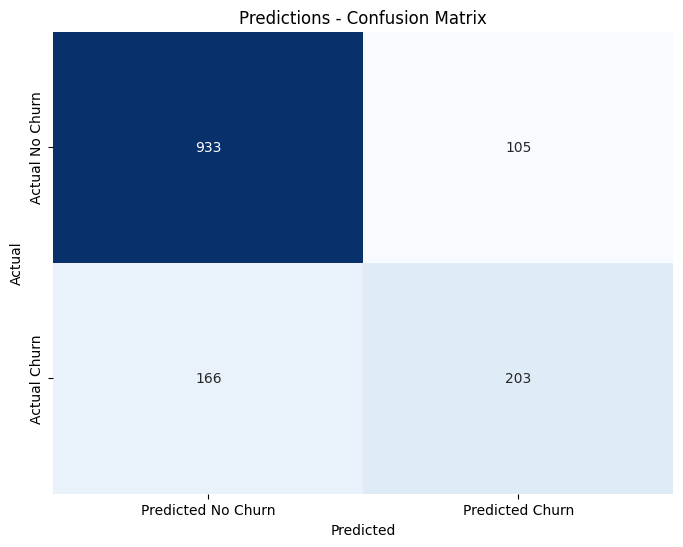

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predictions - Confusion Matrix')
plt.show()

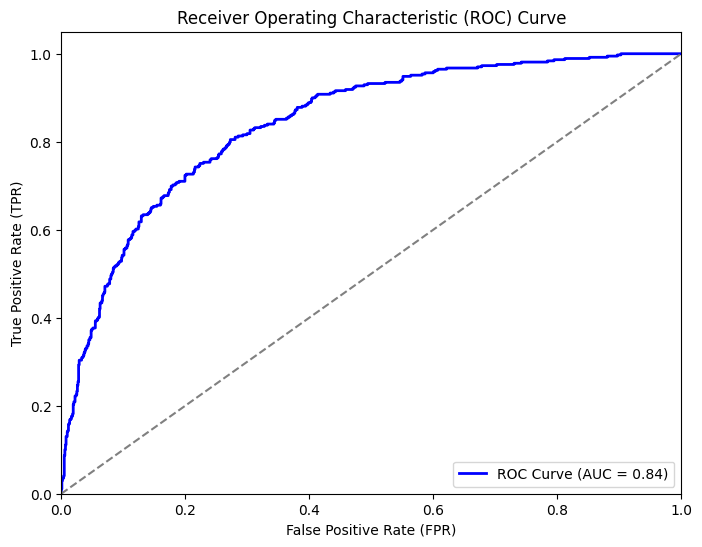

ROC score :  0.8413759522951685


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

Y_pred_proba = log_reg.predict_proba(X_test)
# Calculate the ROC curve,  ROC AUC (Receiver Operating Characteristic Area Under the Curve)
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba[:,1])

# TPR = (True Positives) / (True Positives + False Negatives)
# FPR = (False Positives) / (False Positives + True Negatives)
# The ROC score, often referred to as the ROC AUC (Area Under the ROC Curve) score, is a scalar value that quantifies the overall performance of a binary classification model by summarizing the area under the ROC curve. The ROC AUC score ranges from 0 to 1, with higher values indicating better discrimination between the two classes. An ROC AUC score of 0.5 suggests that the model's performance is equivalent to random chance (no discrimination between classes), while a score of 1 indicates perfect discrimination. In practical terms, a model with a higher ROC AUC score is generally considered to be better at distinguishing between the positive and negative classes.
# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(Y_test, Y_pred_proba[:,1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('ROC score : ',roc_auc)

ROC Curve:

The ROC curve is a graphical representation of a classifier's performance across various discrimination thresholds.
It is created by plotting the True Positive Rate (Sensitivity or Recall) against the False Positive Rate (1 - Specificity) for different threshold values.
The curve helps visualize the trade-off between sensitivity and specificity at different decision thresholds.
AUC (Area Under the Curve):

AUC is a scalar value representing the area under the ROC curve.
It provides a single value that summarizes the overall performance of a classifier across various threshold settings.
AUC ranges from 0 to 1, where a higher AUC indicates better performance.
An AUC of 0.5 suggests a classifier that performs no better than random, while an AUC of 1.0 indicates a perfect classifier.
ROC Score:

ROC Score is often used interchangeably with AUC and refers to the AUC value.
It is the numeric value representing the area under the ROC curve.


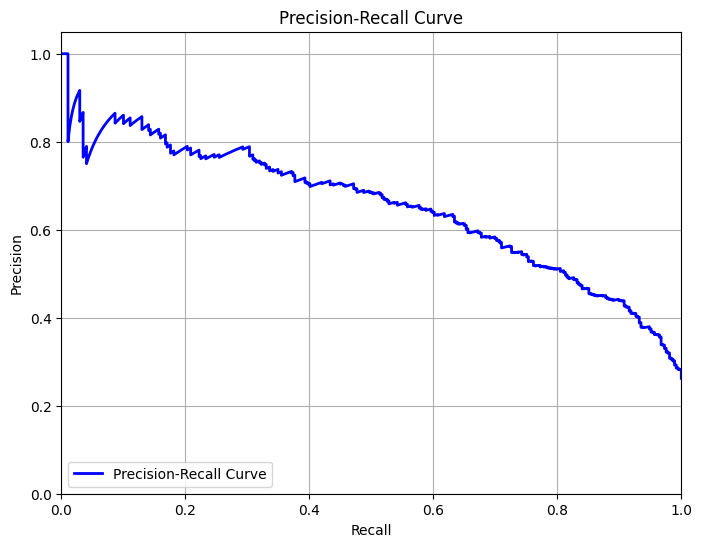

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

Y_pred_proba = log_reg.predict_proba(X_test)

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred_proba[:,1])

# Precision = (True Positives) / (True Positives + False Positives)
# Recall = (True Positives) / (True Positives + False Negatives)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.show()

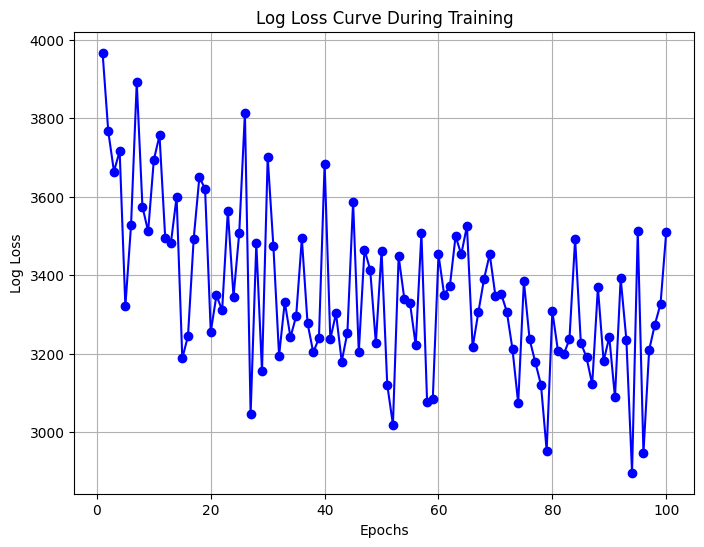

In [ ]:
import tensorflow as tf

# Create a simple logistic regression model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and record log loss values
history = model.fit(X_train, Y_train, epochs=100, verbose=0)

# Access log loss values from the training history
training_losses = history.history['loss']

# Create an array of epoch numbers
epochs = np.arange(1, len(training_losses) + 1)

# Plot the log loss curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_losses, marker='o', linestyle='-', color='b')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Log Loss Curve During Training')
plt.grid(True)
plt.show()

# To plot the log loss function curve during model training, we need to access the log loss values at each epoch during training. Unfortunately, scikit-learn's LogisticRegression does not provide a direct way to access the log loss values at each iteration,that's why we needed to use TensorFlow in order to access loss values at each iteration or epoch.

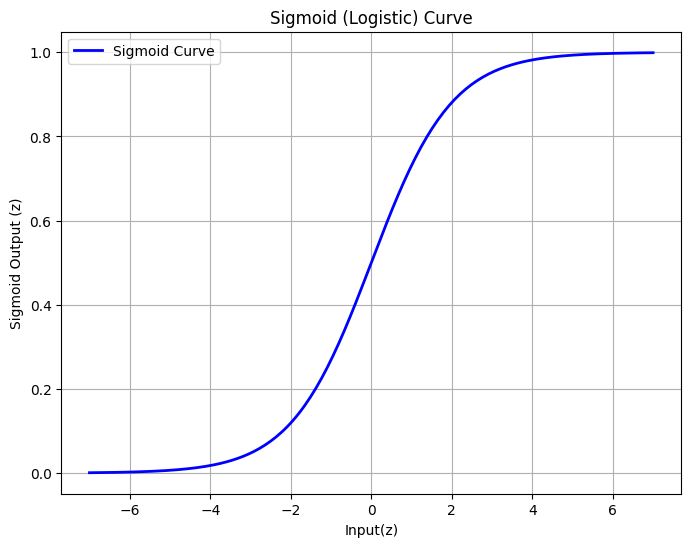

In [ ]:
# Define the sigmoid (logistic) function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values for the x-axis (z)
z = np.linspace(-7, 7, 200)  # Range of z values

# Calculate the corresponding sigmoid values
sigmoid_values = sigmoid(z)

# Plot the sigmoid curve
plt.figure(figsize=(8, 6))
plt.plot(z, sigmoid_values, color='b', lw=2, label='Sigmoid Curve')
plt.xlabel('Input(z)')
plt.ylabel('Sigmoid Output (z)')
plt.title('Sigmoid (Logistic) Curve')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Significance - The sigmoid curve in logistic regression is significant because it maps input features to a bounded range (0 to 1), allowing the model to estimate probabilities for binary classification, and its shape facilitates threshold-based classification decisions.
# Sigmoid function - σ(z)= 1/1+e^-z

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a range of values for the 'C' hyperparameter to experiment with
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameter value from the grid search
best_C = grid_search.best_params_['C']

# Print the best hyperparameter
print(f"Best 'C' Hyperparameter: {best_C}")

# Hyperparameter tuning is a crucial step in machine learning model development. It involves systematically searching for the best combination of hyperparameters to optimize a model's performance. Hyperparameters are configuration settings for a machine learning algorithm that are not learned from the data but must be set prior to training the model. In the case of logistic regression, the hyperparameter we're tuning is typically C, which controls the regularization strength. After the hyperparameter tuning is complete, the code retrieves the best-performing C value (best_C) from the grid search results using grid_search.best_params_. This value represents the optimal regularization strength that yielded the highest accuracy on the training data.
# the concepts of cross-validation, regularization strength, and hyperparameter tuning with an example using logistic regression.

# Example Scenario: We have a dataset containing information about customer churn in a telecommunications company. The goal is to build a logistic regression model to predict whether a customer will churn or not based on various features such as contract type, monthly charges, and customer tenure.

# 1. Cross-Validation:

# Meaning: Cross-validation is a technique used to assess how well a machine learning model will generalize to new, unseen data. It helps prevent overfitting and provides a more reliable estimate of a model's performance.

# Example:

# Suppose we have a dataset with 1,000 samples. We decide to use 5-fold cross-validation.
# The dataset is divided into 5 equal-sized "folds" (subsets) labeled as Fold 1, Fold 2, ..., Fold 5.
# The cross-validation process involves the following steps:
# Train the logistic regression model on Folds 1 to 4 (80% of the data) and evaluate its performance on Fold 5 (20% of the data).
# Train the model on Folds 1, 2, 3, and 5 and evaluate it on Fold 4.
# Continue this process until each fold has served as the validation set once.
# After each iteration, we have performance metrics (e.g., accuracy, F1-score) for the model on different validation sets.
# We can compute the average performance score across all iterations to get a more reliable estimate of the model's performance.
# 2. Regularization Strength:

# Meaning: Regularization is a technique used to prevent overfitting by adding a penalty term to the model's cost function. The strength of this penalty is controlled by a hyperparameter called C in logistic regression. Smaller C values increase regularization strength, while larger values decrease it.

# Example:

# When training a logistic regression model, you can specify different values of C to control the regularization.
# For example, C=0.01 implies strong regularization, which penalizes large coefficients. This helps in creating simpler models that are less prone to overfitting.
# On the other hand, C=1 implies weaker regularization, which allows the model to fit the training data more closely.
# 3. Hyperparameter Tuning:

# Meaning: Hyperparameter tuning is the process of finding the best values for hyperparameters like C to optimize a model's performance.

# Example:

# In our logistic regression example, we might want to find the best C value that yields the highest accuracy on unseen data.
# We can use cross-validation during hyperparameter tuning to systematically try different C values and evaluate their performance.
# For instance, we might perform a grid search over values like [0.001, 0.01, 0.1, 1, 10, 100] for C.
# Cross-validation is used to assess each model's performance with different C values, and the one that results in the best cross-validated performance is selected as the optimized hyperparameter.
# In summary, cross-validation helps us evaluate a model's generalization performance, regularization strength controls the trade-off between model complexity and overfitting, and hyperparameter tuning is the process of finding the best hyperparameter values using techniques like cross-validated grid search. These concepts are crucial for building robust and well-performing machine learning models.

Best 'C' Hyperparameter: 10


Recommendations :
By implementing dynamic pricing strategies and churn prediction alerts based on the model's behavior, TelCoX can proactively address customer churn, retain valuable customers, and optimize their retention efforts. These technical recommendations leverage the predictive power of the model to take targeted actions in real time, reducing churn and improving customer satisfaction.